# ECBM E4070 Project 2 Task #1 [ON-OFF Circuit in Antennal Lobe]

    Name: Suheyla Tozan, Vanshika Sriram, Ivan Rivera
    Uni: stt2126, vs2668, ier2112

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [34]:
A = np.load('/Users/vanshikasriram/Desktop/final/osn_response.npy', allow_pickle=True).item()
B = np.load('/Users/vanshikasriram/Desktop/final/affinity_dict.npy', allow_pickle=True).item()

#random odorant identity
number = random.randint(0,109)
number_2 = random.randint(0,23)

#get random odorant for A
A_list = list(A.keys())
A_odorant = A_list[number]

#get random odorant for B
B_list = list(B.keys())
B_odorant = B_list[number]

#get random receptor
receptor_list = list(A[A_odorant].keys())
receptor = receptor_list[number_2]

#extract values
A_val = A[A_odorant][receptor]['traces']
B_val = B[B_odorant][receptor]

In [35]:
#Initializing time array and creating stimulus
dt = 1e-4
time = np.arange(0,3,dt) 
stimulus = A_val*B_val

In [36]:
#Implementing Post-Synaptic Local Neuron model
#use forward euler's method to solve iLN/eLN
#general equations with s = 100, R = 3, C = .01, L = .5, tau = 96.62, RC = .047, C1 = 4.7

y_funct = lambda i, x, p, tau: .1*np.exp(tau*(i*p-x))
z_funct = lambda a, i, x, p, tau: a*(.1*np.exp(tau*(i*p-x)))

dv_dt = lambda v, i, stim, C, s, R: i/C + (s*stim - v)/(C*R)
di_dt = lambda v, stim, s, L: (s*stim-v)/L
dx_dt = lambda i, x, p, RC, tau, C1: -x/(RC)+(.1*np.exp(tau*(i*p-x)))/C1


#iLN
def iLN(p = -1, a = -.12, stim=stimulus, s = 100, R = 3., C = .01, 
        L = .5, tau=96.62, RC = 0.047, C1 = 4.7):
   
    v = np.zeros_like(time)
    i = np.zeros_like(time)
    x = np.zeros_like(time)
    y = np.zeros_like(time)
    z = np.zeros_like(time)
    
    #ICs are satisfied through np.zeros
    
    for t in range(len(time)-1):
        y[t] = y_funct(i[t],x[t],p, tau)
        z[t] = z_funct(a,i[t],x[t],p, tau)
        
        v[t+1] = v[t] + (dv_dt(v[t], i[t], stim[t], C, s, R))*dt
        i[t+1] = i[t] + (di_dt(v[t], stim[t], s, L))*dt
        x[t+1] = x[t] + (dx_dt(i[t], x[t], p, RC, tau, C1))*dt
        
    return v,i,x,y,z

#eLN
def eLN(p = 1, a = 5e-2, stim=stimulus, s = 100, R = 3., C = .01, 
        L = .5, tau=96.62, RC = 0.047, C1 = 4.7):
    
    v = np.zeros_like(time)
    i = np.zeros_like(time)
    x = np.zeros_like(time)
    y = np.zeros_like(time)
    z = np.zeros_like(time)
    
    #ICs are satisfied through np.zeros
    
    for t in range(len(time)-1):
        y[t] = y_funct(i[t],x[t],p, tau)
        z[t] = z_funct(a,i[t],x[t],p, tau)
        
        v[t+1] = v[t] + (dv_dt(v[t], i[t], stim[t], C, s, R))*dt
        i[t+1] = i[t] + (di_dt(v[t], stim[t], s, L))*dt
        x[t+1] = x[t] + (dx_dt(i[t], x[t], p, RC, tau, C1))*dt

    return v,i,x,y,z

In [37]:
output_iLN = iLN(stim=stimulus)
output_eLN = eLN(stim=stimulus)

In [38]:
def plotter(output, t = time, LN = "iLN"):
    concentrations = 5
    rows = 5
    columns = 1
    fig, axes = plt.subplots(rows, columns, figsize=(14,20))
    
    for i, var in enumerate(['v', 'i', 'x', 'y', 'z']):
        axes[i].plot(time, output[i], color = 'red')
        axes[i].set_title("{} vs time ({})".format(var,LN)) 
    
    plt.show()

odorant name: phenethyl acetate 
receptor: Or43a


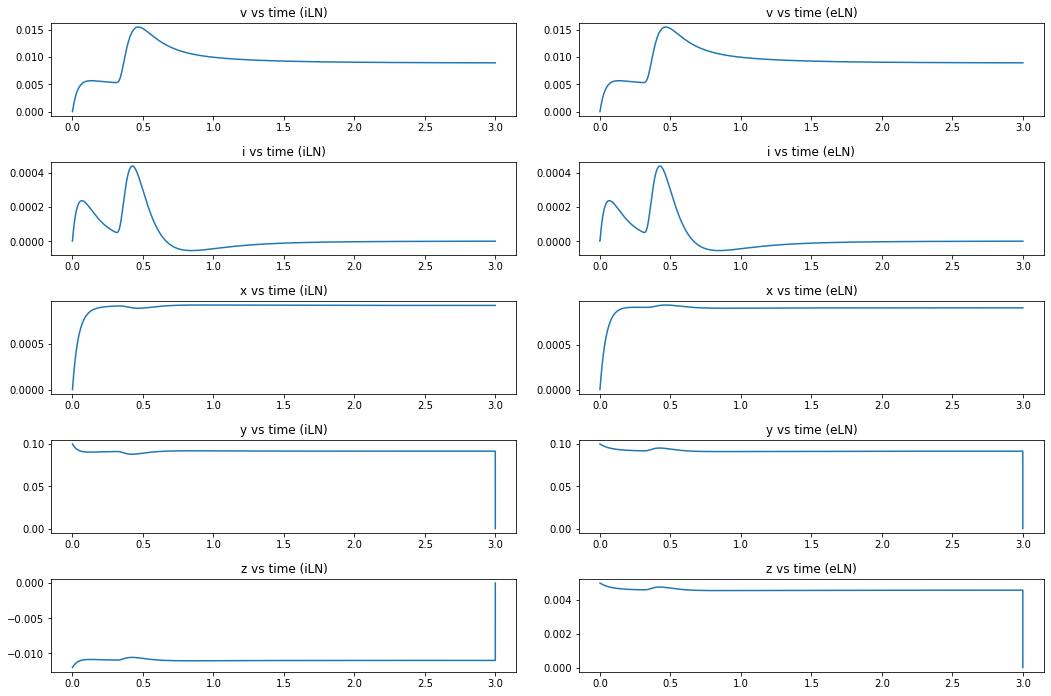

In [39]:
#create plots
    
fig, axs = plt.subplots(5,2,figsize=(15,10))
fig.tight_layout(pad=2.5)

titles = ['v', 'i', 'x', 'y', 'z'] #corresponds to rows

for i,j in enumerate(titles):
    axs[i,0].plot(time,output_iLN[i])
    axs[i,0].set_title("{} vs time (iLN)".format(j))
    
    
    axs[i,1].plot(time,output_eLN[i])
    axs[i,1].set_title("{} vs time (eLN)".format(j))

print("odorant name: {} \nreceptor: {}".format(A_odorant, receptor))

In [40]:
#Formula for a step stimulus to find parameters where peak responses are delayed by ~100 ms
def generate_step_stimulus(t_range, concentration):
   
    u = np.zeros_like(t_range) 
    for t, time in enumerate(t_range):
        if time < 0.5:
            u[t] = 0
        elif 0.5 <= time:
            u[t] = concentration
    
    return u

In [41]:
#Generating step stimulus
step = generate_step_stimulus(time, 1.)
out_eLN = eLN(stim=step, C = .02, L = .7, tau=1.)

Peak response is shown as well as peak input


<Figure size 1026x216 with 0 Axes>

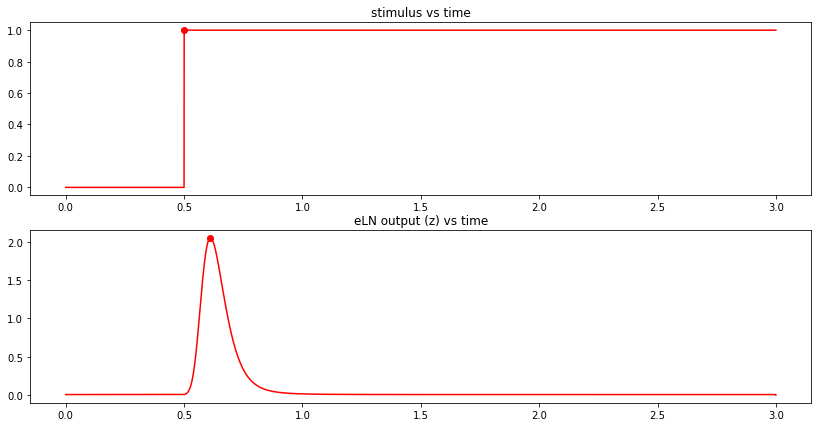

In [42]:
#Plotting step stimulus vs output, z
plt.figure(figsize=(14.25,3))
fig, axes = plt.subplots(2, 1, figsize=(14,7))

#find location of peak response
loc = np.where(out_eLN[4] == np.amax(out_eLN[4]))

axes[0].plot(time, step, color = 'red')
axes[0].scatter(time[np.where(time == 0.5)], step[np.where(time == 0.5)], color = 'red')
axes[0].set_title("stimulus vs time")

axes[1].scatter(time[6115], [np.amax(out_eLN[4])], color = 'red')
axes[1].plot(time, out_eLN[4], color = 'red')
axes[1].set_title("eLN output (z) vs time") 

print("Peak response is shown as well as peak input")


 Plotting all outputs for parameters where peak responses are delayed by ~100 ms


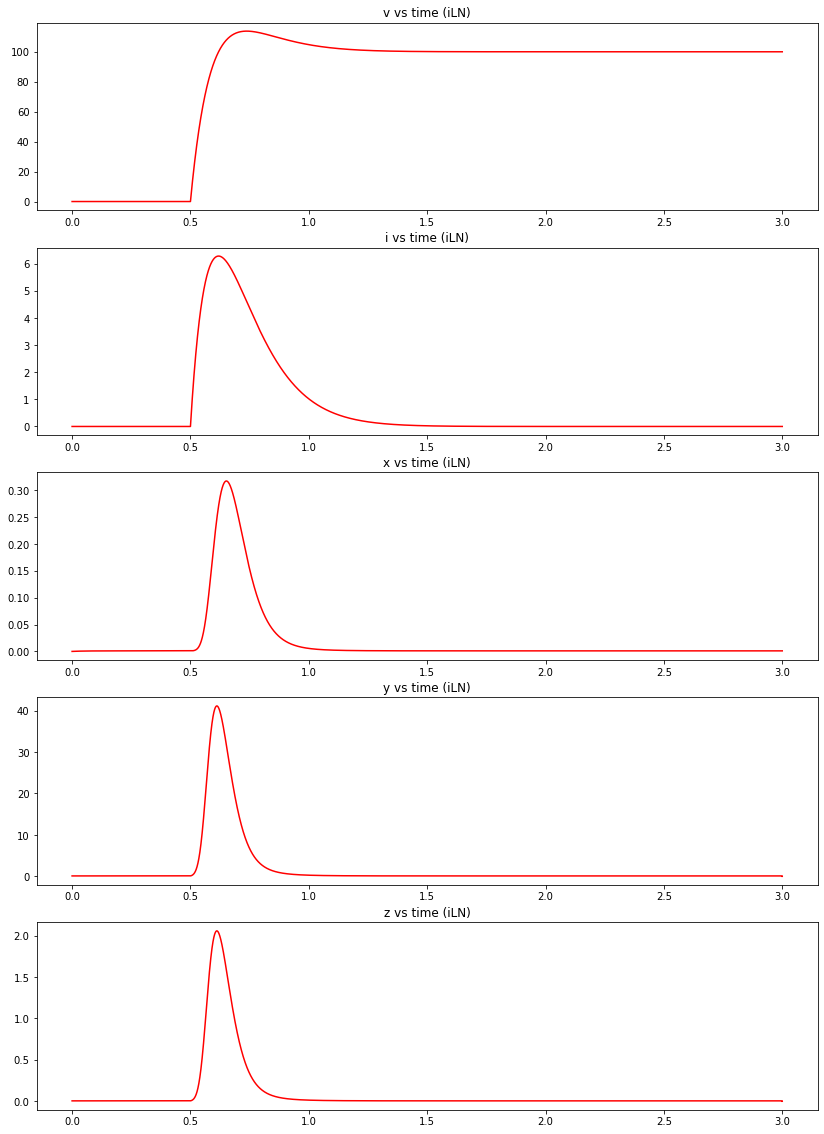

In [44]:
#Plotting all outputs for parameters where peak responses are delayed by ~100 ms
print('\n Plotting all outputs for parameters where peak responses are delayed by ~100 ms')
plotter(out_eLN, LN = "iLN")